<a href="https://colab.research.google.com/github/Abhi-tupe/Abhi-tupe/blob/main/flaws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imbalanced-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [3]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [5]:
train_df = pd.read_csv("/content/UNSW_NB15_testing-set.csv")
test_df = pd.read_csv("/content/UNSW_NB15_training-set.csv")

print(train_df.shape, test_df.shape)
print(train_df['label'].value_counts())


(82332, 45) (175341, 45)
label
1    45332
0    37000
Name: count, dtype: int64


In [6]:
train_df = pd.read_csv("/content/UNSW_NB15_testing-set.csv").drop(["id",], axis =1)
test_df = pd.read_csv("/content/UNSW_NB15_training-set.csv").drop(["id",], axis =1)

In [7]:
train_df.head()
test_df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [8]:

print(train_df['attack_cat'].unique())
print(test_df['attack_cat'].unique())

print(train_df['attack_cat'].value_counts())
print(test_df['attack_cat'].value_counts())

all_data = pd.concat([train_df, test_df])
print(all_data['attack_cat'].value_counts())


['Normal' 'Reconnaissance' 'Backdoor' 'DoS' 'Exploits' 'Analysis'
 'Fuzzers' 'Worms' 'Shellcode' 'Generic']
['Normal' 'Backdoor' 'Analysis' 'Fuzzers' 'Shellcode' 'Reconnaissance'
 'Exploits' 'DoS' 'Worms' 'Generic']
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64
attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Wor

In [9]:
dataset_cols = [
    "dur","proto","service","state","spkts","dpkts","sbytes","dbytes",
    "rate","sttl","dttl","sload","dload","sloss","dloss","sinpkt",
    "dinpkt","sjit","djit","swin","stcpb","dtcpb","dwin","tcprtt",
    "synack","ackdat","smean","dmean","trans_depth","response_body_len",
    "ct_srv_src","ct_state_ttl","ct_dst_ltm","ct_src_dport_ltm",
    "ct_dst_sport_ltm","ct_dst_src_ltm","is_ftp_login","ct_ftp_cmd",
    "ct_flw_http_mthd","ct_src_ltm","ct_srv_dst","is_sm_ips_ports",
    "attack_cat","label"
]


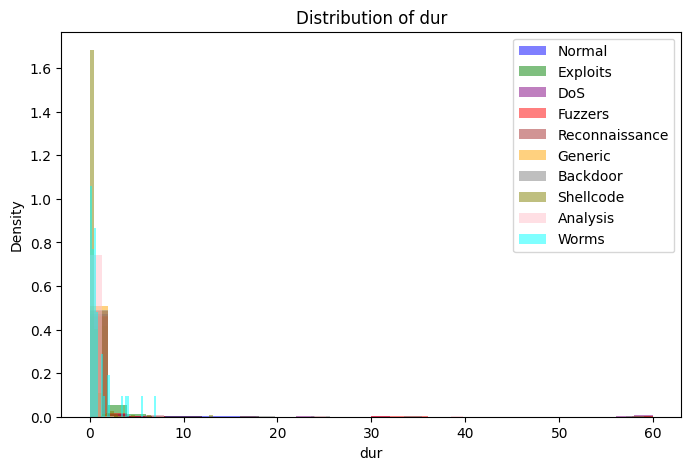

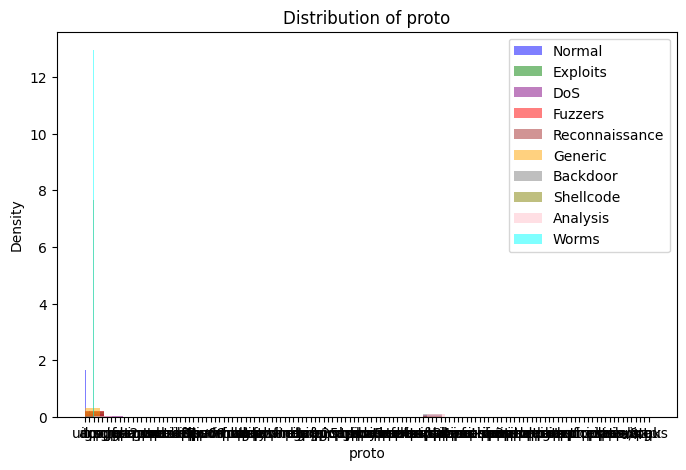

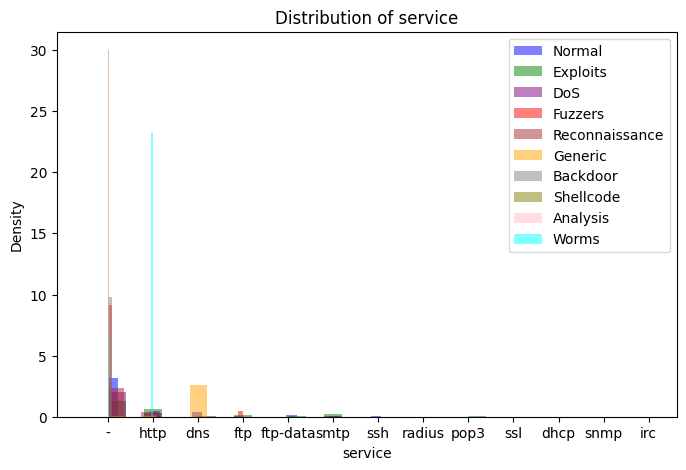

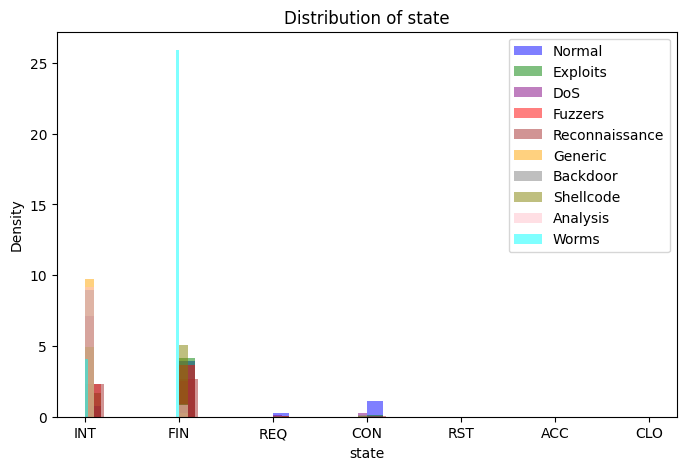

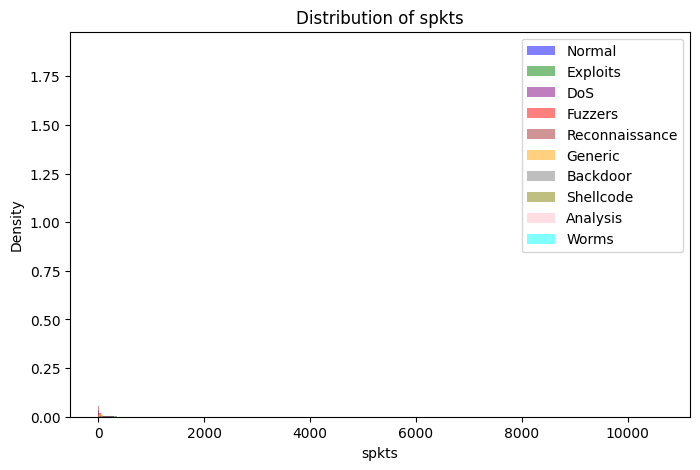

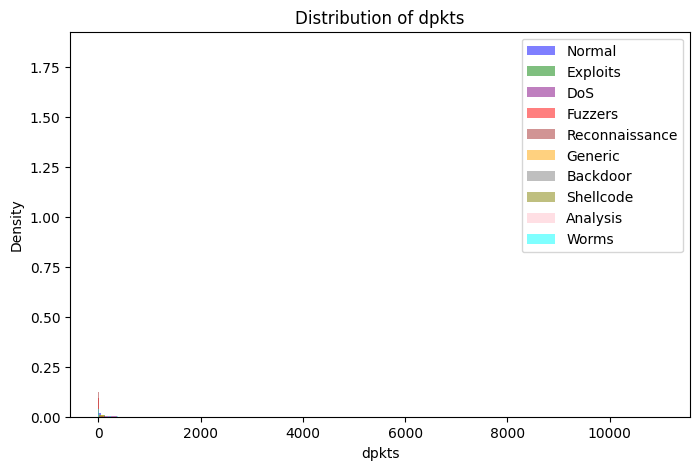

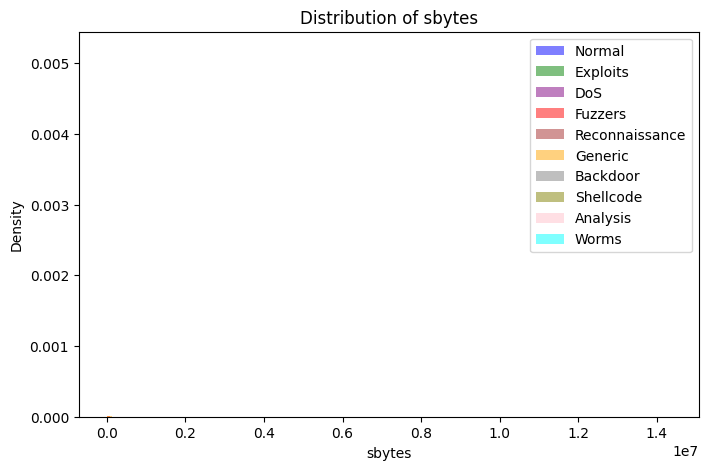

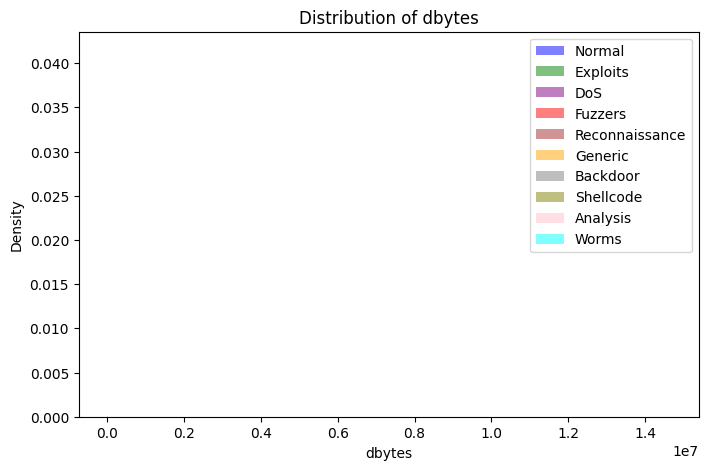

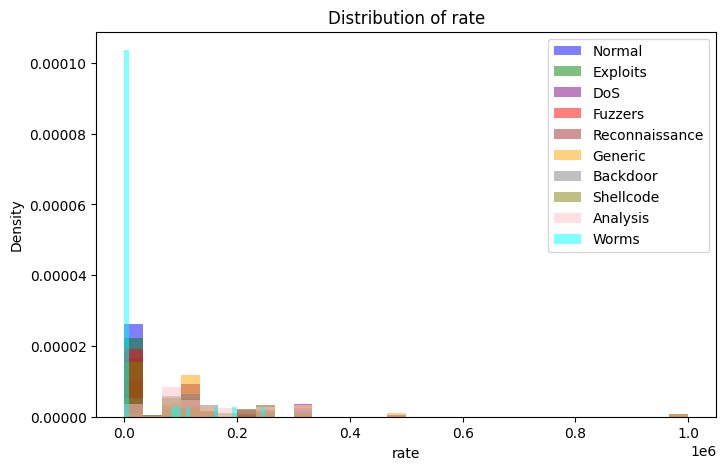

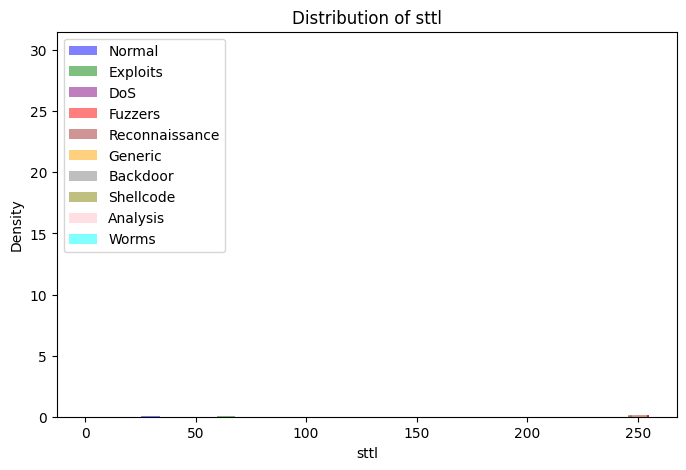

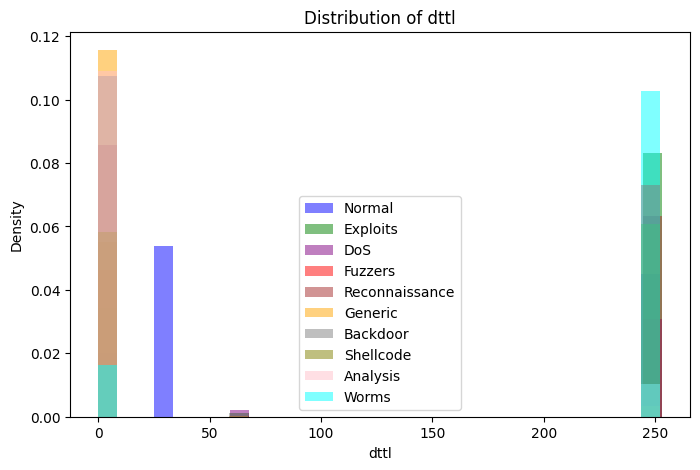

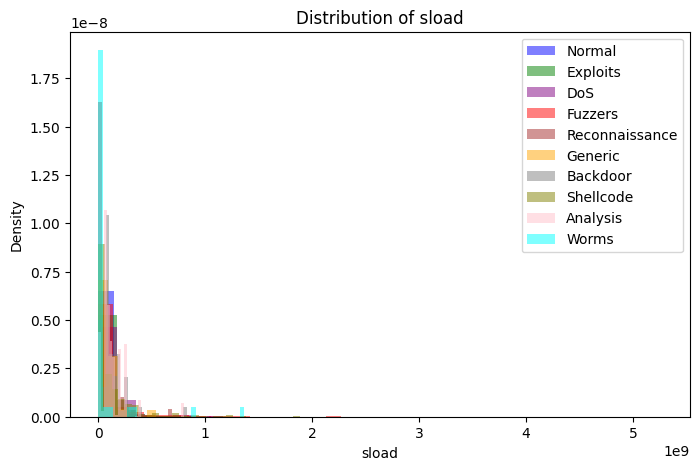

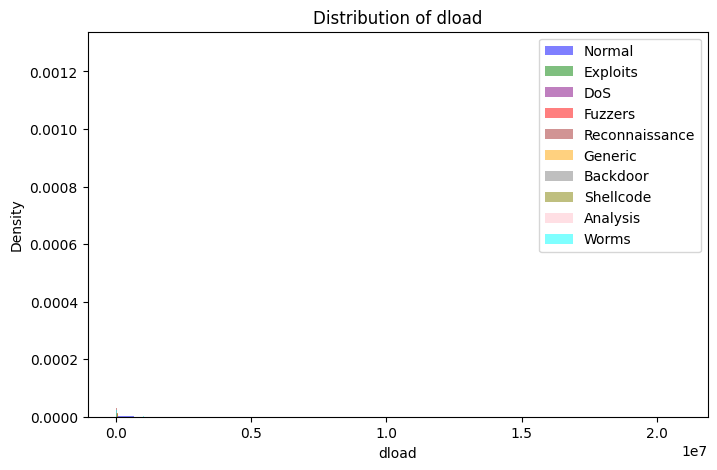

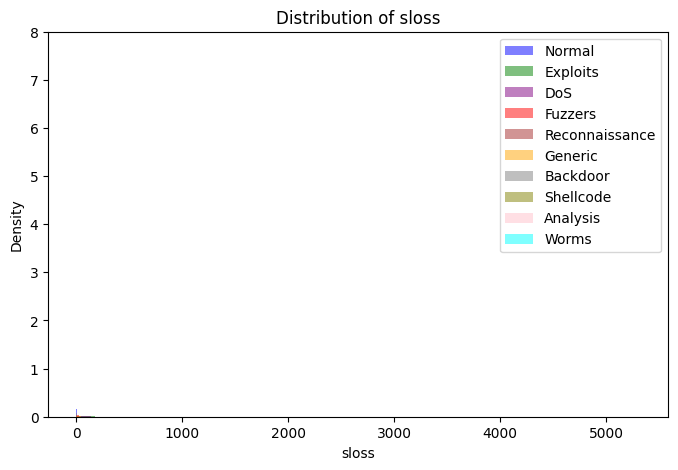

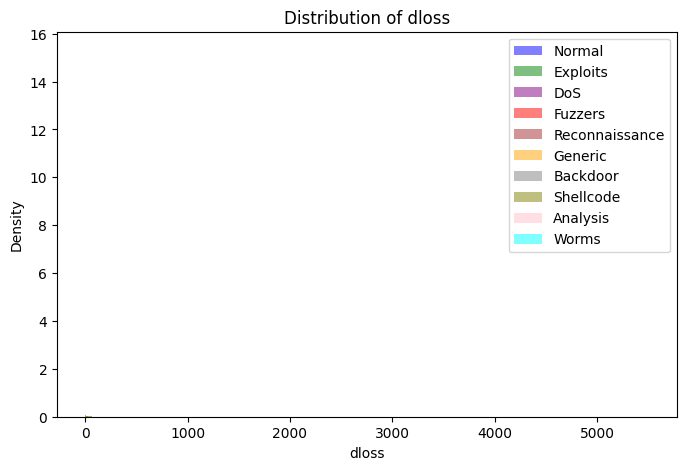

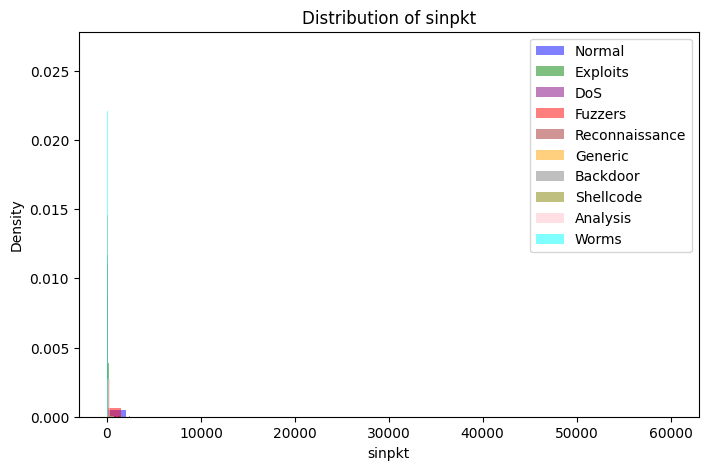

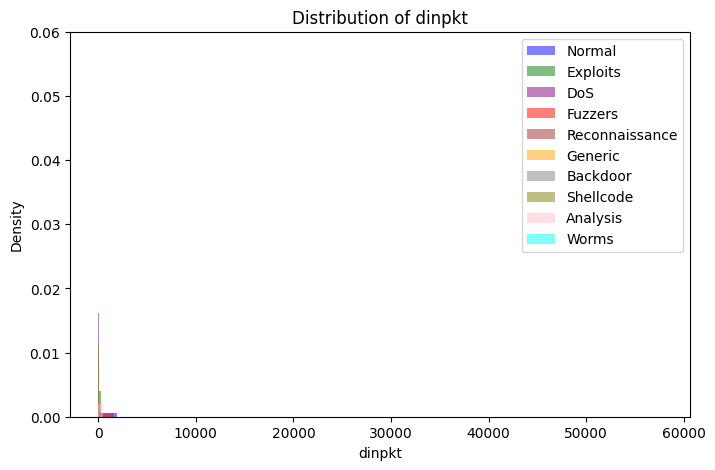

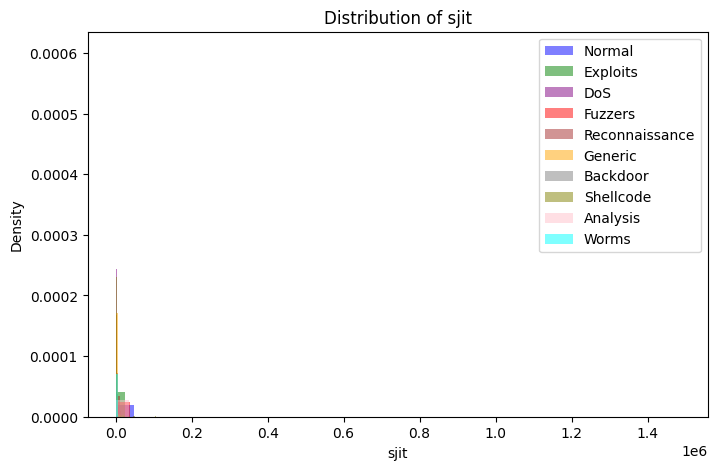

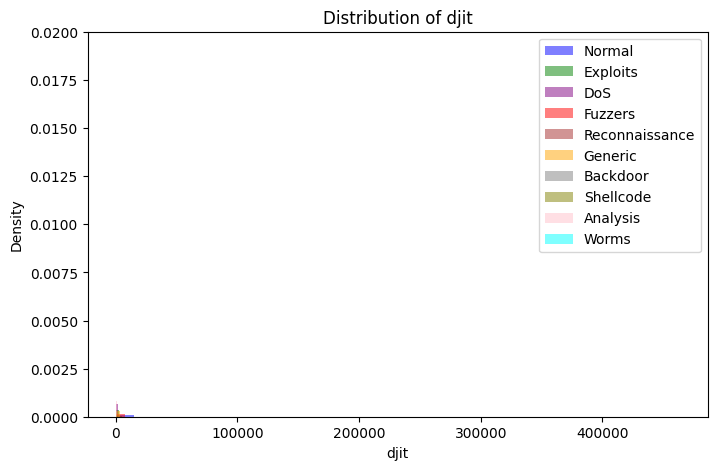

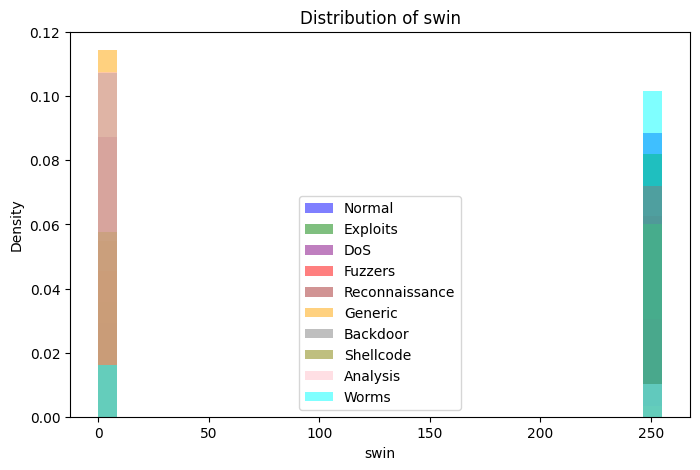

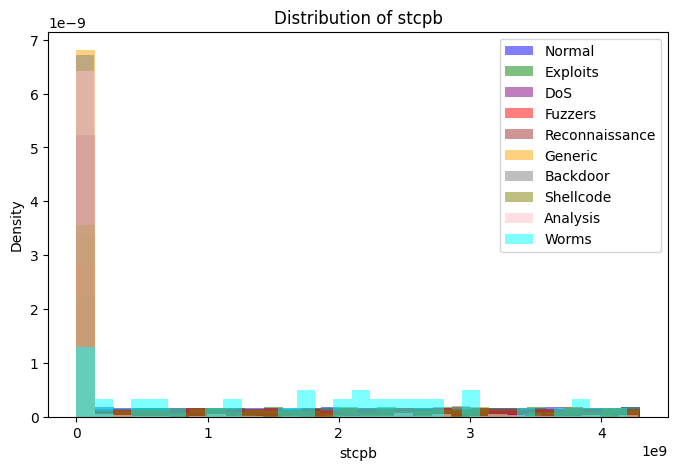

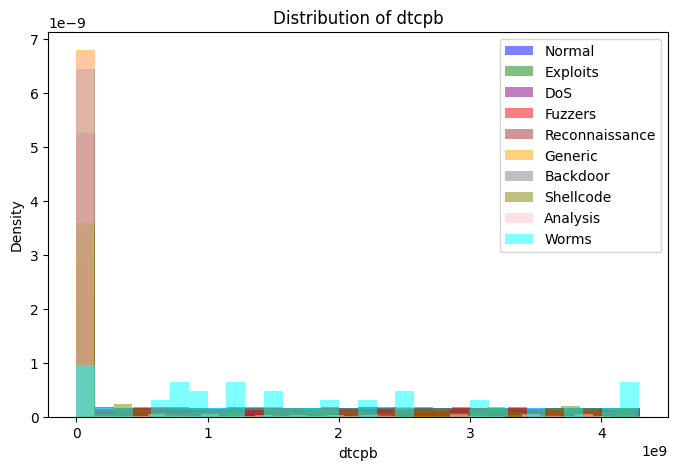

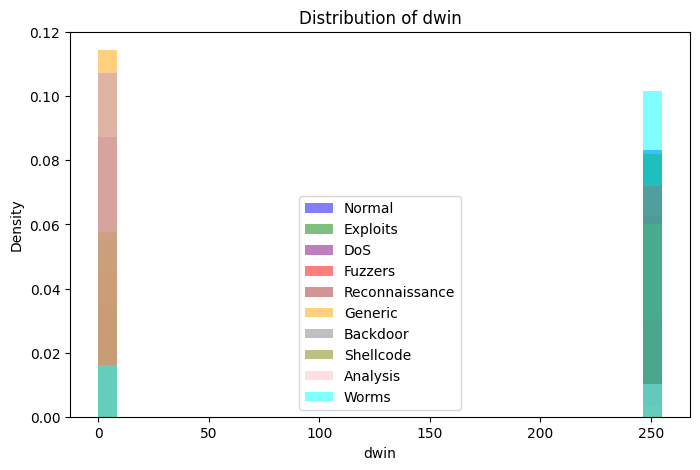

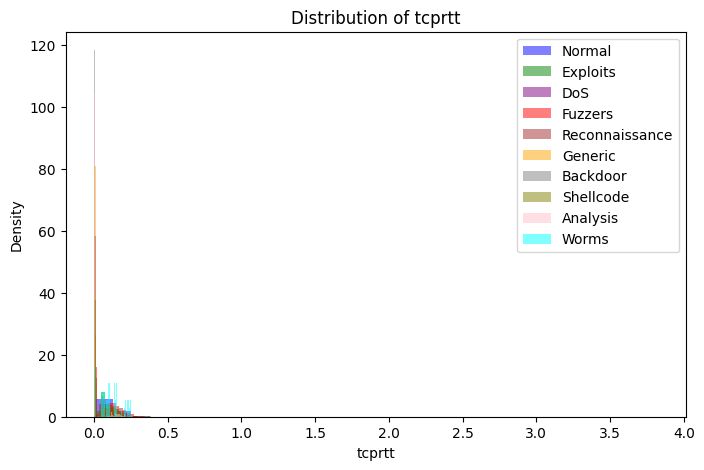

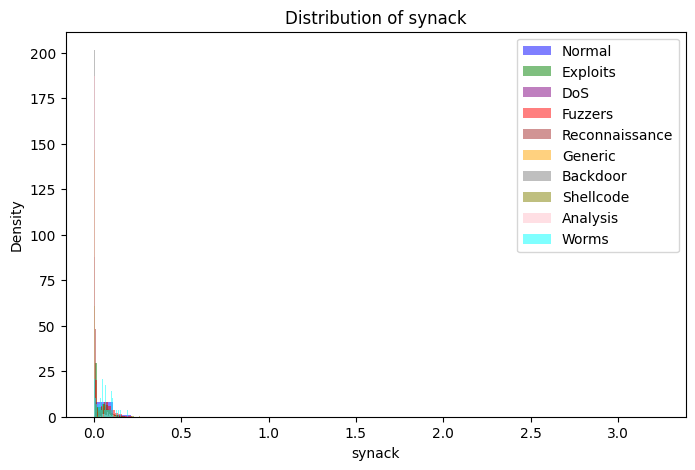

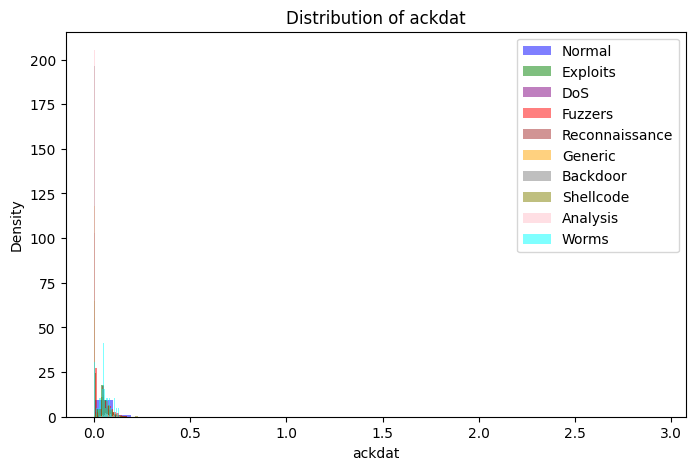

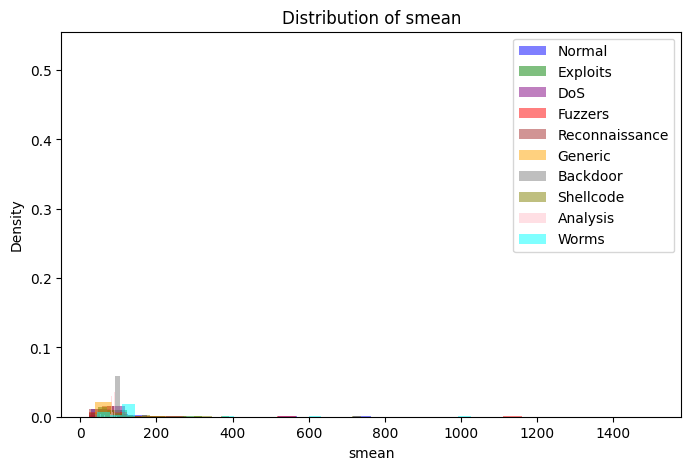

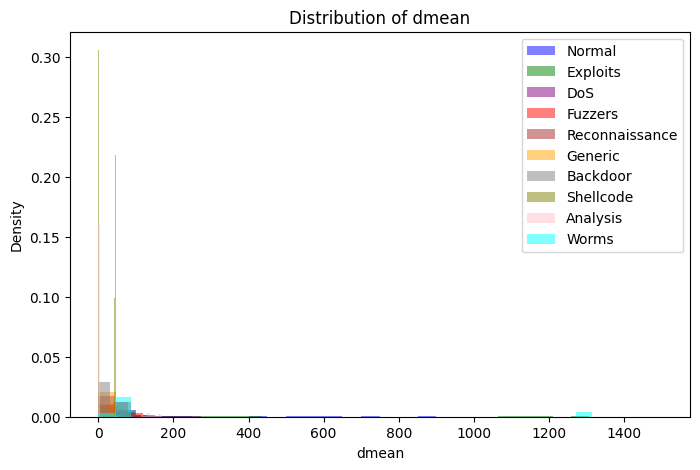

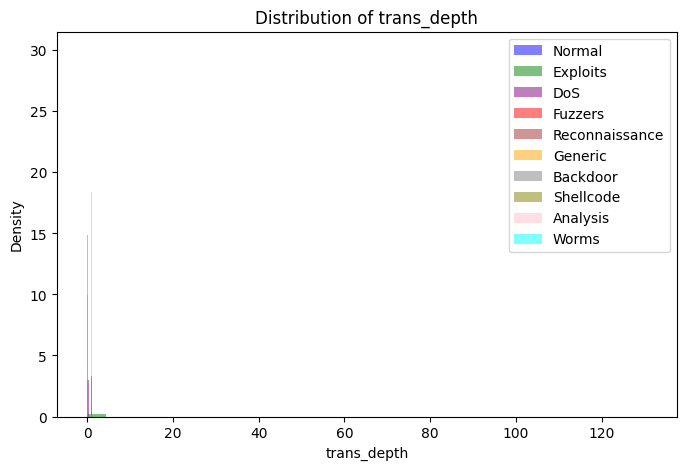

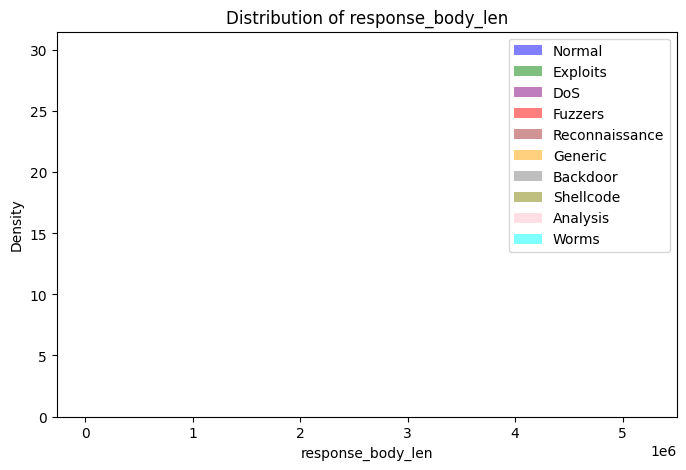

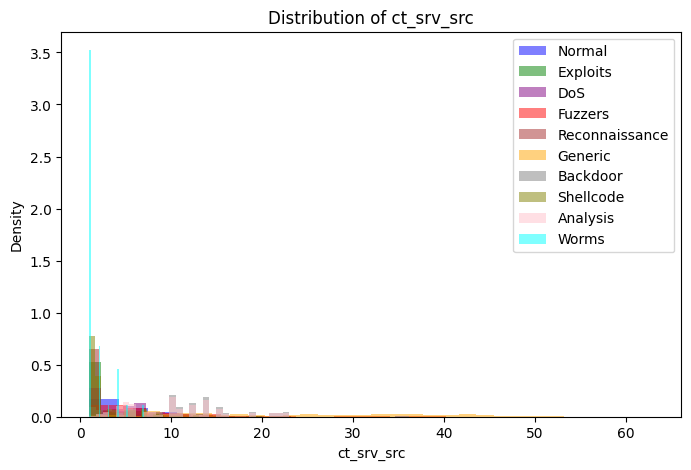

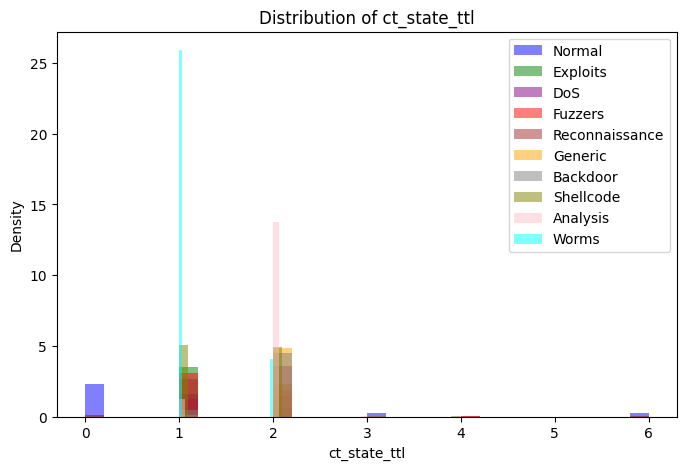

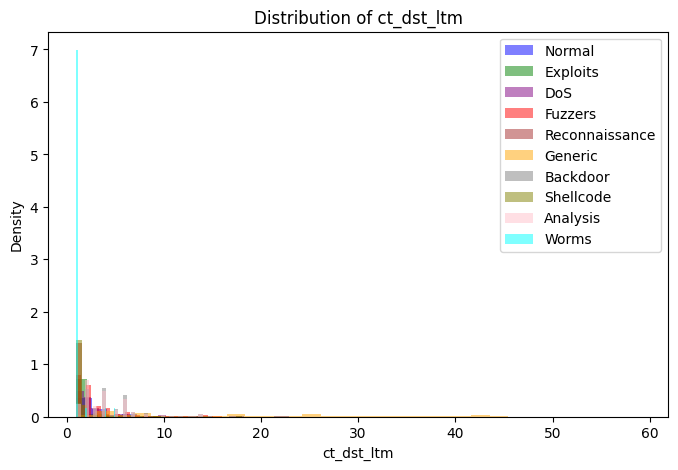

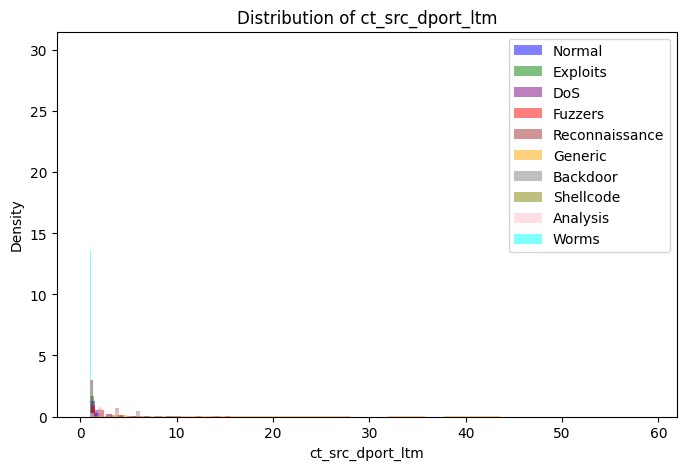

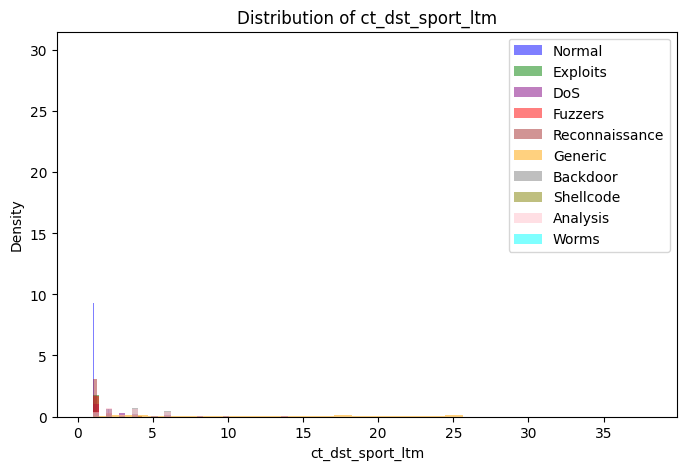

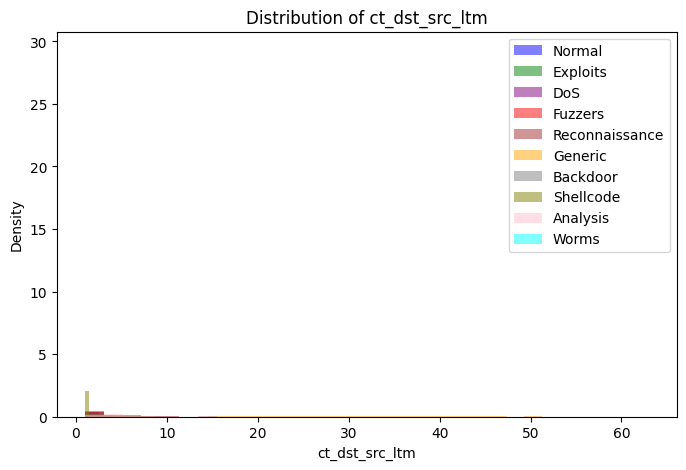

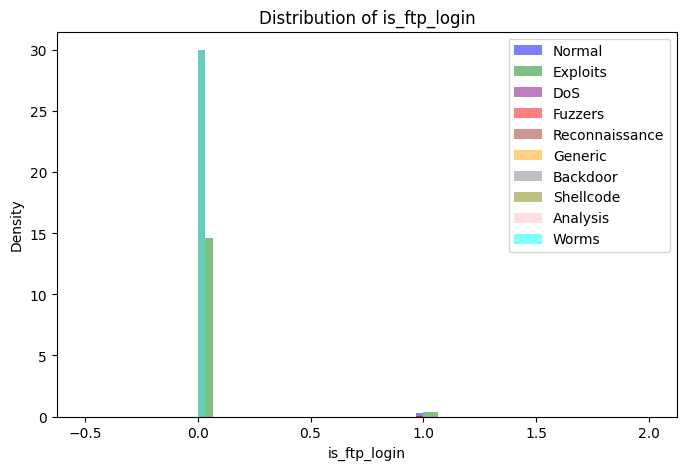

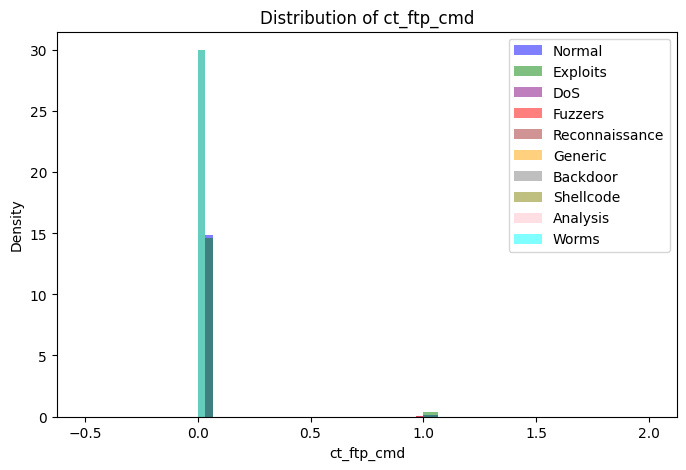

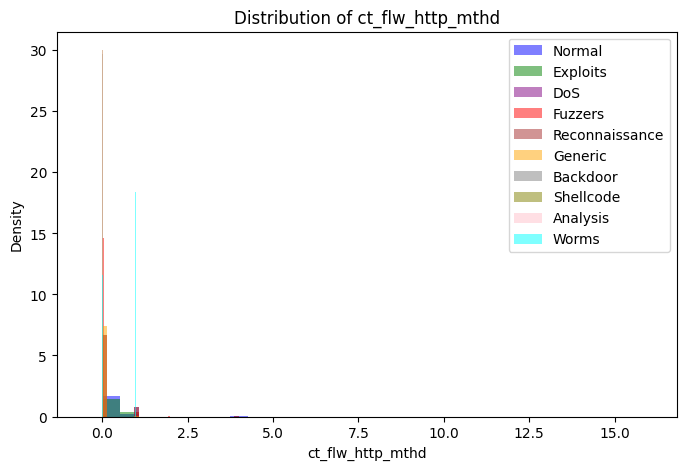

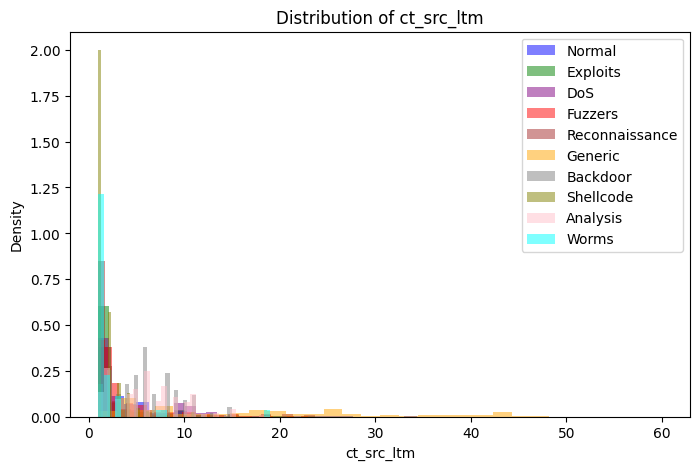

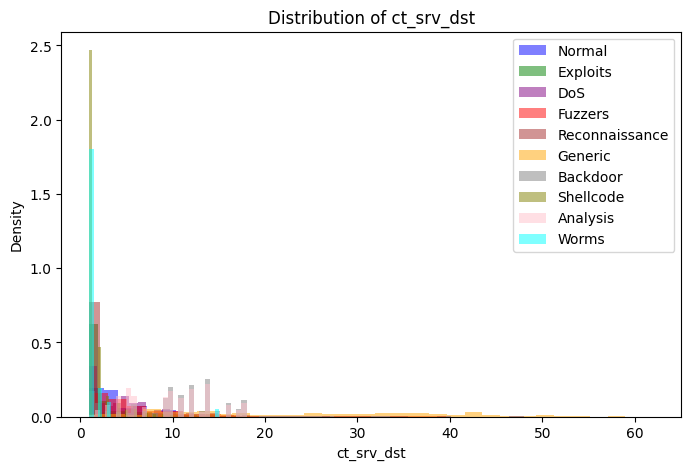

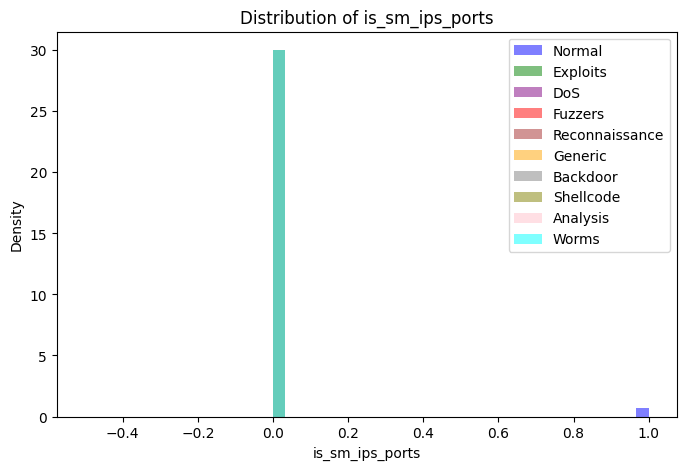

In [10]:
colors = {
    "Normal": "blue",
    "Exploits": "green",
    "DoS": "purple",
    "Fuzzers": "red",
    "Reconnaissance": "brown",
    "Generic": "orange",
    "Backdoor": "grey",
    "Shellcode": "olive",
    "Analysis": "pink",
    "Worms": "cyan"
}

for col in dataset_cols[:-2]:
    plt.figure(figsize=(8,5))

    for category, color in colors.items():
        subset = train_df[train_df["attack_cat"] == category]
        if not subset.empty:
            plt.hist(subset[col], bins=30, alpha=0.5, density=True,
                     color=color, label=category)

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()


In [11]:


full_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

print(full_df.shape)
print(full_df['attack_cat'].value_counts())


(257673, 44)
attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64


In [12]:
full_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
train, valid, test = np.split(
    full_df.sample(frac=1, random_state=42),
    [int(0.6*len(full_df)), int(0.8*len(full_df))]
)

print("Full dataset:", full_df.shape)
print("Train:", train.shape)
print("Valid:", valid.shape)
print("Test:", test.shape)


Full dataset: (257673, 44)
Train: (154603, 44)
Valid: (51535, 44)
Test: (51535, 44)


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
from sklearn.preprocessing import LabelEncoder


In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

def preprocess_data(train, valid, test, target="attack_cat", oversample=False):
    y_train = train[target]
    y_valid = valid[target]
    y_test  = test[target]
    if y_train.dtype == 'object':
        le_y = LabelEncoder()
        y_train = le_y.fit_transform(y_train)
        y_valid = le_y.transform(y_valid)
        y_test  = le_y.transform(y_test)
    else:
        le_y = None
    cat_cols = train.select_dtypes(include=['object']).drop(columns=[target]).columns
    num_cols = train.select_dtypes(exclude=['object']).columns

    num_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
        ])
    cat_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
        ])

    preprocessor = ColumnTransformer([
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ])


    X_train = preprocessor.fit_transform(train.drop(columns=[target]))
    X_valid = preprocessor.transform(valid.drop(columns=[target]))
    X_test  = preprocessor.transform(test.drop(columns=[target]))

    if oversample:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train = ros.fit_resample(X_train, y_train)

    return X_train, y_train, X_valid, y_valid, X_test, y_test, le_y, preprocessor


In [21]:
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_dense  = X_test.toarray()  if hasattr(X_test, "toarray") else X_test

nb_model = GaussianNB()
nb_model.fit(X_train_dense, y_train)

y_pred = nb_model.predict(X_test_dense)


In [22]:
X_train, y_train, X_valid, y_valid, X_test, y_test, label_encoder, preprocessor = preprocess_data(
    train, valid, test, target="attack_cat", oversample=True
)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [26]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.06      0.18      0.09       545
           1       0.04      0.19      0.07       461
           2       0.29      0.00      0.01      3231
           3       0.91      0.21      0.35      8908
           4       0.58      0.10      0.17      4814
           5       0.78      0.98      0.87     11862
           6       1.00      1.00      1.00     18652
           7       0.11      0.02      0.03      2736
           8       0.06      1.00      0.12       300
           9       0.00      0.81      0.01        26

    accuracy                           0.64     51535
   macro avg       0.38      0.45      0.27     51535
weighted avg       0.78      0.64      0.64     51535

